Lucas Behrend y Martina Cenedese Problema a resolver: Buscamos clasificar imagenes en 8 clases (angry, confused, disgust, happy, neutral, sad, shy y surprise), según la emoción expresada. Lo resolvemos mediante una CNN.



In [ ]:
from PIL import Image
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory, plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
file = '/content/drive/MyDrive/fane_data'
alto = 148
ancho = 115
dataset = image_dataset_from_directory(file, image_size=(alto, ancho), batch_size = 1024)
class_names = dataset.class_names
print(class_names)
      # imagenes = []
# outputs = []
# for carpeta in os.listdir(file):
#     ruta_carpeta = os.path.join(file, carpeta)

#     for imagen_nombre in os.listdir(ruta_carpeta):
#         ruta_imagen = os.path.join(ruta_carpeta, imagen_nombre)

#         if os.path.isfile(ruta_imagen) and imagen_nombre.lower().endswith(('.png', '.jpg', '.jpeg')):
#             imagen = Image.open(ruta_imagen)
#             imagenes.append(imagen)
#             if "angry" in imagen_nombre:
#               outputs.append(0)
#             elif "confused" in imagen_nombre:
#               outputs.append(1)
#             elif "disgust" in imagen_nombre:
#               outputs.append(2)
#             elif "fear" in imagen_nombre:
#               outputs.append(3)
#             elif "happy" in imagen_nombre:
#               outputs.append(4)
#             elif "neutral" in imagen_nombre:
#               outputs.append(5)
#             elif "sad" in imagen_nombre:
#               outputs.append(6)
#             elif "shy" in imagen_nombre:
#               outputs.append(7)
#             elif "surprise" in imagen_nombre:
#               outputs.append(8)

#Antes leíamos las imagenes a mano


Found 14012 files belonging to 8 classes.
['angry', 'confused', 'disgust', 'happy', 'neutral', 'sad', 'shy', 'surprise']


In [ ]:
# sizes = []
# for imagen in imagenes:
  # sizes.append(imagen.size)
# suma_ancho = sum(par[0] for par in sizes)
# suma_alto = sum(par[1] for par in sizes)
# promedio_ancho = suma_ancho / len(imagenes)
# promedio_alto = suma_alto / len(imagenes)
# alto = int(promedio_alto)
# ancho = int(promedio_ancho)
# print (ancho, alto)
#Esta celda era para calcular el promedio de tamaño de las imágenes, ya no es necesaria por la funcion image_dataset_from_directory y el parametro image_size.

115 148


In [ ]:
# Esta celda resizeaba imagenes
# resized_images = []
# for imagen in imagenes:
  # resized_image = imagen.resize((ancho, alto))
  # resized_images.append(resized_image)

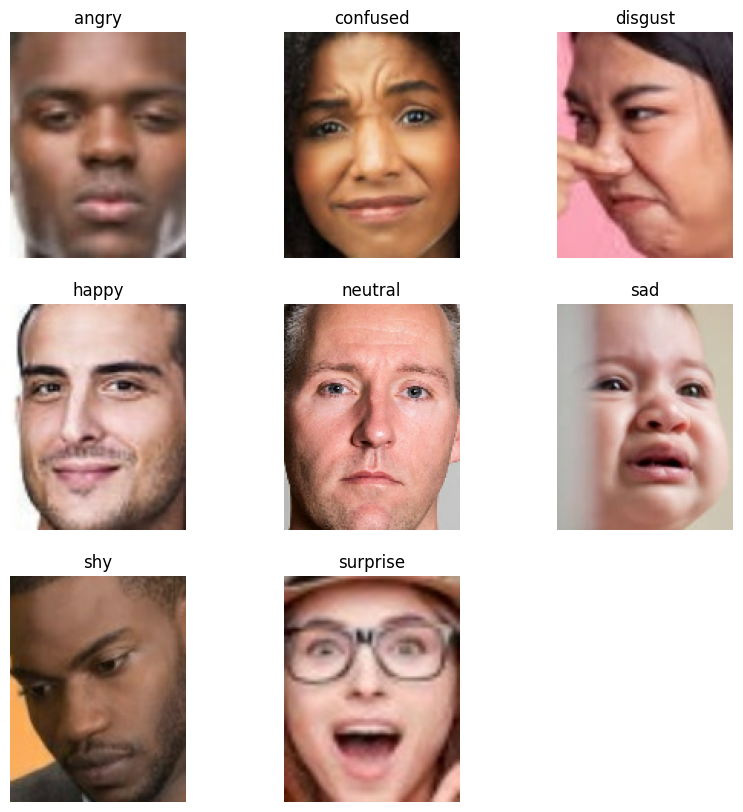

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    unique_labels = set(labels.numpy())

    for i, label in enumerate(unique_labels):
        # Encontrar el índice de la primera imagen con la etiqueta actual
        index = next(index for index, l in enumerate(labels.numpy()) if l == label)

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(class_names[label])
        plt.axis("off")

In [ ]:
# Obtener las labels y las imágenes desde el dataset
images = []
labels = []
for image_batch, label_batch in dataset:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

# Convertir a arrays numpy y convertir las labels a one hot encoding
dataset = None
images = np.array(images)
labels = np.array(labels)
labels = tf.one_hot(labels, 8)
labels = np.array(labels)
print(images.shape, labels.shape)

(14012, 148, 115, 3) (14012, 8)


In [ ]:
#Separar los datos en train y test.
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)
images = None
labels = None
print("Forma de train_images después de eliminar índices problemáticos:", train_images.shape)
print("Forma de train_labels después de eliminar índices problemáticos:", train_labels.shape)

Forma de train_images después de eliminar índices problemáticos: (11209, 148, 115, 3)
Forma de train_labels después de eliminar índices problemáticos: (11209, 8)


In [10]:
#Crear arquitectura del modelo
modelo = models.Sequential()
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(alto, ancho, 3))) #Realiza una convolucion con 32 filtros de 3x3
modelo.add(layers.AveragePooling2D(pool_size=(2, 2))) #Selecciona el promedio de valores en una zona de 2x2 pixeles
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2))) #Selecciona el valor mas alto en una zona de 2x2 pixeles
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

modelo.add(layers.Flatten()) #Aplana los pixeles para meterlos como inputs a la red neuronal

modelo.add(layers.Dense(128, activation='relu')) #Red neuronal
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(64, activation='relu'))

modelo.add(layers.Dense(8, activation='softmax'))  # Capa de salida con 8 neuronas y función de activación softmax

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo (ajusta el número de épocas según sea necesario)
modelo.fit(train_images, train_labels, batch_size = 16, epochs=30, validation_split=0.2)

predictions = modelo.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calcular la precisión
accuracy = accuracy_score(true_labels, predicted_labels)

# Imprimir la precisión
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Epoch 1/30
561/561 [==============================] - 446s 790ms/step - loss: 2.0021 - accuracy: 0.2192 - val_loss: 1.9609 - val_accuracy: 0.2435
Epoch 2/30
561/561 [==============================] - 406s 724ms/step - loss: 1.8392 - accuracy: 0.2946 - val_loss: 1.7965 - val_accuracy: 0.3225
Epoch 3/30
561/561 [==============================] - 410s 732ms/step - loss: 1.7499 - accuracy: 0.3343 - val_loss: 1.7231 - val_accuracy: 0.3483
Epoch 4/30
561/561 [==============================] - 432s 771ms/step - loss: 1.6991 - accuracy: 0.3574 - val_loss: 1.7025 - val_accuracy: 0.3533
Epoch 5/30
561/561 [==============================] - 440s 784ms/step - loss: 1.6323 - accuracy: 0.3774 - val_loss: 1.6802 - val_accuracy: 0.3702
Epoch 6/30
561/561 [==============================] - 421s 750ms/step - loss: 1.5598 - accuracy: 0.4144 - val_loss: 1.6272 - val_accuracy: 0.3756
Epoch 7/30
561/561 [==============================] - 418s 745ms/step - loss: 1.4990 - accuracy: 0.4366 - val_loss: 1.5891 -

1/1 [==============================] - 1s 563ms/step


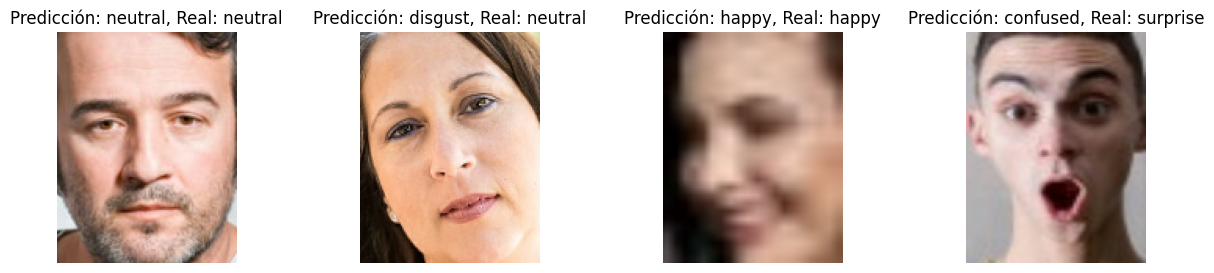

In [17]:
indices_muestra = np.random.choice(len(test_images), size=20, replace=False)
numero_a_clase = {
    0 : "angry",
    1 : "confused",
    2 : "disgust",
    3: "happy",
    4: "neutral",
    5: "sad",
    6: "shy",
    7: "surprise"
}
# Obtener las imágenes y etiquetas correspondientes
muestra_images = test_images[indices_muestra]
muestra_labels = test_labels[indices_muestra]

# Realizar predicciones en las imágenes de muestra
predicciones_muestra = modelo.predict(muestra_images)

# Convertir las predicciones y etiquetas de muestra a etiquetas de clase
clases_predichas = np.argmax(predicciones_muestra, axis=1)
clases_reales = np.argmax(muestra_labels, axis=1)
clases_finales_predichas = list(map(numero_a_clase.get, clases_predichas))
clases_finales_reales = list(map(numero_a_clase.get, clases_reales))

# Visualizar las imágenes y sus etiquetas predichas y reales
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
for i in range(4):
    axs[i].imshow(muestra_images[i]/255.0)
    axs[i].set_title(f'Predicción: {clases_finales_predichas[i]}, Real: {clases_finales_reales[i]}')
    axs[i].axis('off')

plt.show()